['Product ID', 'Product Position', 'Promotion', 'Product Category', 'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name', 'description', 'price', 'currency', 'scraped_at', 'terms', 'section']
['Product ID', 'Product Position', 'Promotion', 'Product Category', 'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name', 'description', 'price', 'currency', 'scraped_at', 'terms', 'section']
   Product Category  Seasonal  Sales Volume
0                 0         0          2823
1                 0         0           654
2                 0         1          2220
3                 0         1          1568
4                 0         1          2942
Mean Squared Error (MSE): 484315.66133166803
R² Score: -0.023419570279862523


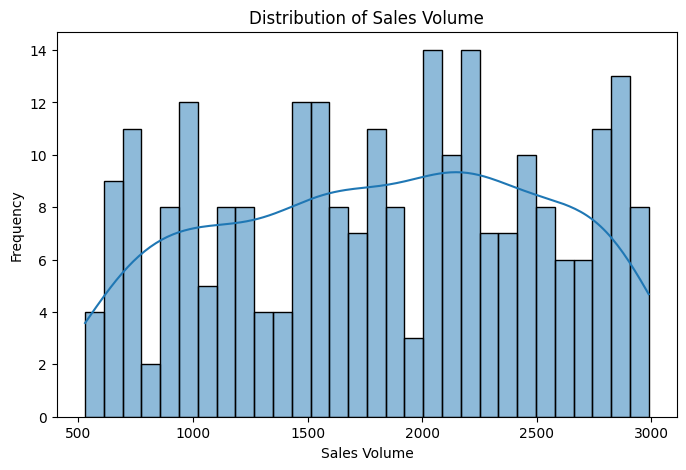

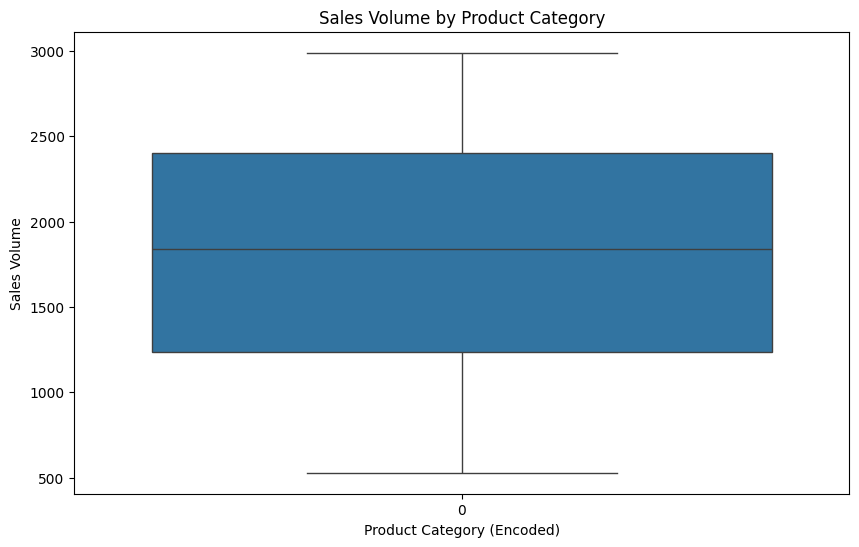

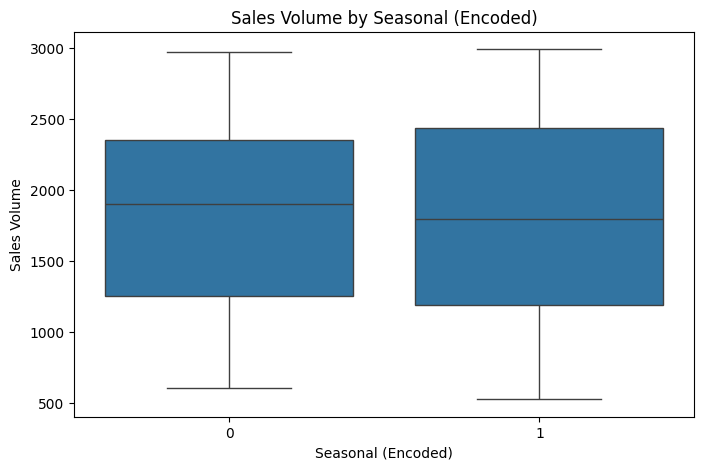

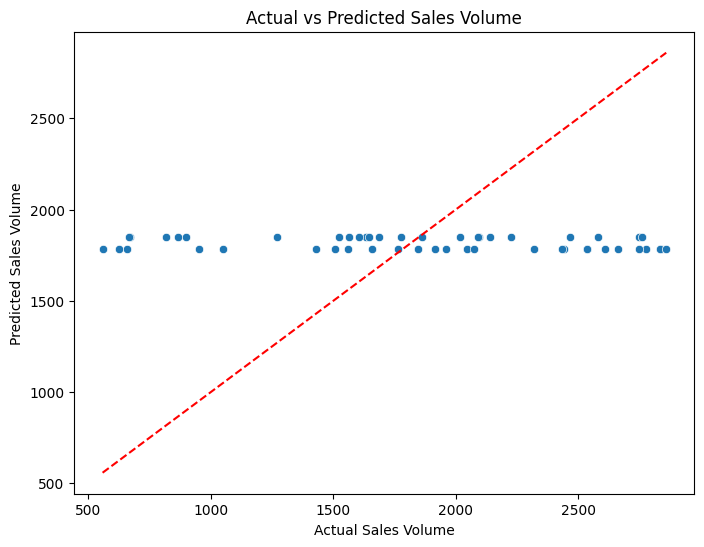

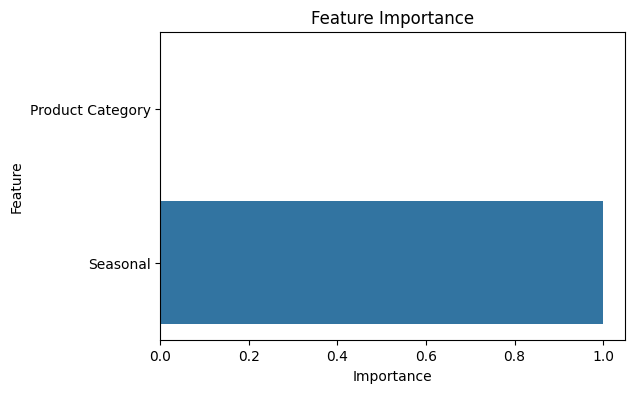

In [11]:
import pandas as pd

df = pd.read_csv('cleaned_zara_sales.csv')
print(df.columns.tolist())


#We will use a regression model (e.g., Random Forest Regressor) to predict sales based on product category, seasonal and sales volume.

#data preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset with correct delimiter
df = pd.read_csv('cleaned_zara_sales.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Print columns to verify
print(df.columns.tolist())

# Keep only relevant columns for modeling
df = df[['Product Category', 'Seasonal', 'Sales Volume']]

# Drop missing values
df.dropna(inplace=True)

# Encode categorical features
le_category = LabelEncoder()
le_seasonal = LabelEncoder()

df['Product Category'] = le_category.fit_transform(df['Product Category'])
df['Seasonal'] = le_seasonal.fit_transform(df['Seasonal'])

# Confirm changes
print(df.head())

#Train-test split
# Features and target
X = df[['Product Category', 'Seasonal']]
y = df['Sales Volume']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Model training
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

#Model Evaluation
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

#Save model results
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results.to_csv('model_predictions.csv', index=False)

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize distribution of Sales Volume
plt.figure(figsize=(8,5))
sns.histplot(df['Sales Volume'], bins=30, kde=True)
plt.title('Distribution of Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')
plt.show()

# 2. Visualize relationship between Product Category and Sales Volume
plt.figure(figsize=(10,6))
sns.boxplot(x='Product Category', y='Sales Volume', data=df)
plt.title('Sales Volume by Product Category')
plt.xlabel('Product Category (Encoded)')
plt.ylabel('Sales Volume')
plt.show()

# 3. Visualize relationship between Seasonal and Sales Volume
plt.figure(figsize=(8,5))
sns.boxplot(x='Seasonal', y='Sales Volume', data=df)
plt.title('Sales Volume by Seasonal (Encoded)')
plt.xlabel('Seasonal (Encoded)')
plt.ylabel('Sales Volume')
plt.show()

# 4. Actual vs Predicted Sales Volume scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=results['Actual'], y=results['Predicted'])
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()],
         'r--')  # diagonal line
plt.title('Actual vs Predicted Sales Volume')
plt.xlabel('Actual Sales Volume')
plt.ylabel('Predicted Sales Volume')
plt.show()

# 5. Feature importance from the Random Forest model
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

